In [ ]:
# compute Jaccard index to measure diversity of 
# responses within an LLM system (or within a query)
# Compute the Jaccard index per every combination of response: 
# J(q1,q2), J(q2,q3), J(q3,q1)
# average the scores per query:
# a diversity score for q2: Divesity(q2)=sum_n(J(qi,q2))/n
# plot Diversity scores per LLM per query

In [2]:
#create a pandas dataframe
import pandas as pd
path = '/Users/shirandudy/Documents/Documents_new/NEU/projects/cities_representation/code'
final_path = path+'/all_models.csv'
df = pd.read_csv(final_path)
df = df.drop(['Unnamed: 0'], axis=1)
#df = df.reset_index()
df

,model,situation,prompt,rec_city1,rec_reasons1,rec_city2,rec_reasons2,rec_city3,rec_reasons3,rec_city4,rec_reasons4,rec_city5,rec_reasons5
0,mistral,relocation,I am making the move to New Jersey for a job p...,Jersey City,Vibrant nightlife and social opportunities;Wal...,Hoboken,Walkable waterfront with parks and views of Ma...,Montclair,Vibrant arts and cultural scene;Walkable downt...,Princeton,Highly ranked schools and safe neighborhoods;V...,Summit,Vibrant downtown area with a variety of restau...
1,mistral,relocation,I am making the move to New Jersey for a job p...,Jersey City,"Vibrant nightlife with numerous bars, restaura...",Hoboken,"Walkable downtown area with numerous bars, res...",Montclair,Vibrant arts and cultural scene with numerous ...,Princeton,Home to prestigious universities and research ...,Red Bank,"Vibrant downtown area with numerous bars, rest..."
2,mistral,relocation,I am making the move to New Jersey for a job p...,Jersey City,"Vibrant nightlife with numerous bars, restaura...",Hoboken,"Walkable downtown area with numerous bars, res...",Montclair,Vibrant arts and cultural scene with numerous ...,Princeton,Home to prestigious universities and research ...,Red Bank,"Vibrant downtown area with numerous bars, rest..."
3,mistral,relocation,Family moving from Northeast state to Alabama ...,Huntsville,Thriving tech industry with numerous remote wo...,Birmingham,Abundant job opportunities in various industri...,Montgomery,State capital with a rich history and cultural...,Auburn,"Home to Auburn University, a top-ranked public...",Mobile,Historic port city with a rich cultural herita...
4,mistral,relocation,Family moving from Northeast state to Alabama ...,Huntsville,Thriving tech industry with numerous remote wo...,Birmingham,Largest city in Alabama with a diverse economy...,Montgomery,State capital with a rich history and a growin...,Auburn,"Home to Auburn University, one of the top publ...",Tuscaloosa,"Home to the University of Alabama, one of the ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,gemma,opening_business,"I don't plan on opening a business just yet, m...","Arlington, VA",Strong foodie scene with diverse cuisine;Proxi...,"Bethesda, MD",Proximity to major transportation hubs;Mix of ...,"Rockville, MD",Affordable cost of living;Strong sense of comm...,"Silver Spring, MD",Diverse population and cultural offerings;Prox...,"Reston, VA",High concentration of technology and healthcar...
194,gemma,opening_business,"I don't plan on opening a business just yet, m...","Arlington, VA",Strong foodie scene with diverse cuisine;Proxi...,"Bethesda, MD",Proximity to major transportation hubs;Mix of ...,"Rockville, MD",Affordable cost of living;Strong sense of comm...,"Silver Spring, MD",Diverse population and cultural offerings;Prox...,"Reston, VA",High concentration of technology and healthcar...
195,gemma,opening_business,What VA city/town/area is in need of a high qu...,"Charlottesville, VA",Lack of high-quality bakery/pizzeria options;G...,"Roanoke, VA",Limited access to quality baked goods and pizz...,"Lynchburg, VA",Need for diverse bakery and pizza offerings;In...,"Blacksburg, VA",Lack of diverse bakery and pizza options outsi...,"Harrisonburg, VA",Limited access to fresh baked goods and gourme...
196,gemma,opening_business,What VA city/town/area is in need of a high qu...,"Charlottesville, VA",Lack of high-quality bakery/pizzeria options;G...,"Roanoke, VA",Limited access to quality baked goods and pizz...,"Lynchburg, VA",Need for diverse bakery and pizza offerings;In...,"Blacksburg, VA",Lack of diverse bakery and pizza options outsi...,"Harrisonburg, VA",Limited access to fresh baked goods and gourme...


In [6]:
# (1) tf-idf it on the per justification level (5 doc per response)
# after each response's list is generated compare with kendall Tau and generate a score per response
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.tokenize import word_tokenize

#import nltk
#nltk.download('punkt')

# create object
tfidf = TfidfVectorizer(analyzer='word', stop_words = 'english')

# create a vector per row
all_cities = []
for row in range(len(df.index)):
    cities = []
    for rec in ['rec_city1', 'rec_city2', 'rec_city3', 'rec_city4', 'rec_city5']:
        city = df.iloc[row][rec]
        city = city.split(",")[0]
        # preprocess text (rm punctuations)
        city = city.lower()

        # apprend to list
        cities.append(city) 
    all_cities.append(cities)

df['city_list'] = all_cities
df

,model,situation,prompt,rec_city1,rec_reasons1,rec_city2,rec_reasons2,rec_city3,rec_reasons3,rec_city4,rec_reasons4,rec_city5,rec_reasons5,city_list
0,mistral,relocation,I am making the move to New Jersey for a job p...,Jersey City,Vibrant nightlife and social opportunities;Wal...,Hoboken,Walkable waterfront with parks and views of Ma...,Montclair,Vibrant arts and cultural scene;Walkable downt...,Princeton,Highly ranked schools and safe neighborhoods;V...,Summit,Vibrant downtown area with a variety of restau...,"[jersey city, hoboken, montclair, princeton, s..."
1,mistral,relocation,I am making the move to New Jersey for a job p...,Jersey City,"Vibrant nightlife with numerous bars, restaura...",Hoboken,"Walkable downtown area with numerous bars, res...",Montclair,Vibrant arts and cultural scene with numerous ...,Princeton,Home to prestigious universities and research ...,Red Bank,"Vibrant downtown area with numerous bars, rest...","[jersey city, hoboken, montclair, princeton, r..."
2,mistral,relocation,I am making the move to New Jersey for a job p...,Jersey City,"Vibrant nightlife with numerous bars, restaura...",Hoboken,"Walkable downtown area with numerous bars, res...",Montclair,Vibrant arts and cultural scene with numerous ...,Princeton,Home to prestigious universities and research ...,Red Bank,"Vibrant downtown area with numerous bars, rest...","[jersey city, hoboken, montclair, princeton, r..."
3,mistral,relocation,Family moving from Northeast state to Alabama ...,Huntsville,Thriving tech industry with numerous remote wo...,Birmingham,Abundant job opportunities in various industri...,Montgomery,State capital with a rich history and cultural...,Auburn,"Home to Auburn University, a top-ranked public...",Mobile,Historic port city with a rich cultural herita...,"[huntsville, birmingham, montgomery, auburn, m..."
4,mistral,relocation,Family moving from Northeast state to Alabama ...,Huntsville,Thriving tech industry with numerous remote wo...,Birmingham,Largest city in Alabama with a diverse economy...,Montgomery,State capital with a rich history and a growin...,Auburn,"Home to Auburn University, one of the top publ...",Tuscaloosa,"Home to the University of Alabama, one of the ...","[huntsville, birmingham, montgomery, auburn, t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,gemma,opening_business,"I don't plan on opening a business just yet, m...","Arlington, VA",Strong foodie scene with diverse cuisine;Proxi...,"Bethesda, MD",Proximity to major transportation hubs;Mix of ...,"Rockville, MD",Affordable cost of living;Strong sense of comm...,"Silver Spring, MD",Diverse population and cultural offerings;Prox...,"Reston, VA",High concentration of technology and healthcar...,"[arlington, bethesda, rockville, silver spring..."
194,gemma,opening_business,"I don't plan on opening a business just yet, m...","Arlington, VA",Strong foodie scene with diverse cuisine;Proxi...,"Bethesda, MD",Proximity to major transportation hubs;Mix of ...,"Rockville, MD",Affordable cost of living;Strong sense of comm...,"Silver Spring, MD",Diverse population and cultural offerings;Prox...,"Reston, VA",High concentration of technology and healthcar...,"[arlington, bethesda, rockville, silver spring..."
195,gemma,opening_business,What VA city/town/area is in need of a high qu...,"Charlottesville, VA",Lack of high-quality bakery/pizzeria options;G...,"Roanoke, VA",Limited access to quality baked goods and pizz...,"Lynchburg, VA",Need for diverse bakery and pizza offerings;In...,"Blacksburg, VA",Lack of diverse bakery and pizza options outsi...,"Harrisonburg, VA",Limited access to fresh baked goods and gourme...,"[charlottesville, roanoke, lynchburg, blacksbu..."
196,gemma,opening_business,What VA city/town/area is in need of a high qu...,"Charlottesville, VA",Lack of high-quality bakery/pizzeria options;G...,"Roanoke, VA",Limited access to quality baked goods and pizz...,"Lynchburg, VA",Need for diverse bakery and pizza offerings;In.

In [7]:
#apply Jaccard index (Kendall Tau) to compare responses of the same LLM
import scipy.stats as stats
from collections import defaultdict
import itertools
all_taus = []
all_sys = []
prompts = df.prompt.unique()
for system in ['gemma', 'gpt35', 'anthropic', 'gpt4o', 'llama', 'mistral']:
    
    df_sys = df[df['model']==system] # similarity within the same system
    for prompt in prompts:
        #print(prompt)
        df_prmp = df_sys[df_sys['prompt']==prompt] # similarity within same queries
        #print(df_prmp)
        all_terms = list(df_prmp['city_list'])
        #print(len(all_terms))
        #print(system)
        d_queries = defaultdict(float)
        for (n_1, n_2) in itertools.combinations(range(len(all_terms)), 2):
            q_1 = all_terms[n_2]
            q_2 = all_terms[n_1]
            #print(q_1)
            #print(q_2)
            #q_2 = list("abcdefghijklmno")
            tau = 1-(2*(len(q_1+q_2)-len(set(q_1+q_2)))/len(q_1+q_2))
            #tau, _ = stats.kendalltau(q_1, q_2)
            d_queries[n_1]+=tau
            d_queries[n_2]+=tau
            #print(tau)
        #print(d_queries)
        for key in d_queries.keys():
            # build list of scores for the plot
            #print(d_queries[key])
            #print(len(all_terms)-1)
            all_taus.append((d_queries[key]/(len(all_terms)-1)))
            #all_taus.append((1-(d_queries[key]/(len(all_terms)-1)))/2)
            # build list of systems for the plot
            all_sys.append(system) 

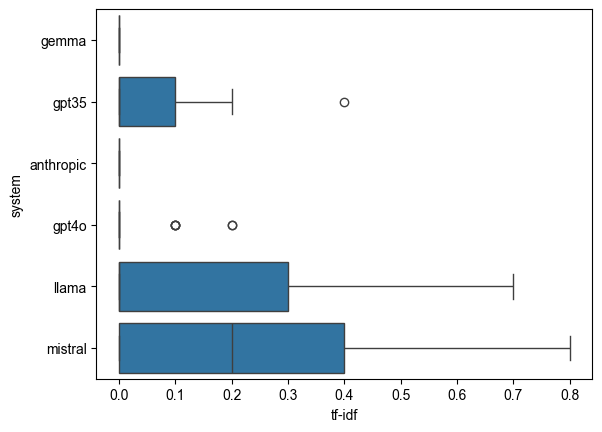

In [8]:
import pandas as pd
import seaborn as sns

jaccard = pd.DataFrame({"system": all_sys, "tf-idf": all_taus})
sns.boxplot(data=jaccard, x="tf-idf", y="system")
#sns.violinplot(data=jaccard, x="Jaccard similarity", y="system", split=True, inner="quart")
sns.set_style("darkgrid")
#g = sns.violinplot(data=jaccard, x="Jaccard Similarity", y="system", inner="point")
#g.set(xlim=(0, 1))


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.tokenize import word_tokenize

#import nltk
#nltk.download('punkt')

# create object
tfidf = TfidfVectorizer(analyzer='word', stop_words = 'english')

# apply Jaccard index (Kendall Tau) to compare responses of the same LLM
import scipy.stats as stats
from collections import defaultdict
import itertools

all_taus2 = []
all_sys2 = []


for prompt in prompts: # per prompt
    llm_dict = defaultdict(float)
    df_prmp = df[df['prompt']==prompt]
    
    for system in ['gemma', 'anthropic', 'gpt35', 'gpt4o', 'llama', 'mistral']: # per system
        df_sys = df_prmp[df_prmp['model']==system]
        res_docs = [] # a list of documents or responses for the same prompt
        llm_list = [] # all responses for same q on same llm
        for row in range(len(df_sys.index)):
            city_list = df_sys.iloc[row]['city_list']
            llm_list.extend(city_list)
        llm_dict[system] = list(set(llm_list))

    for (sys1, sys2) in itertools.combinations(['gemma', 'anthropic', 'gpt35', 'gpt4o', 'llama', 'mistral'], 2):
        q_1 = llm_dict[sys1]
        #print(q_1)
        #print(sys1)
        q_2 = llm_dict[sys2]
        #print(q_2)
        #print(sys2)
        tau = 1-(2*(len(q_1+q_2)-len(set(q_1+q_2)))/len(q_1+q_2))
        #print(len(set(q_1+q_2)))
        #print(len(q_1+q_2))
        print('the jaccard similariy of {} and {} is {}'.format(sys1, sys2, tau))
        all_sys2.append(sys1)
        all_taus2.append(tau)
        all_sys2.append(sys2)
        all_taus2.append(tau)


the jaccard similariy of gemma and anthropic is 0.6
the jaccard similariy of gemma and gpt35 is 0.4545454545454546
the jaccard similariy of gemma and gpt4o is 0.4
the jaccard similariy of gemma and llama is 0.4
the jaccard similariy of gemma and mistral is 0.4545454545454546
the jaccard similariy of anthropic and gpt35 is 0.4545454545454546
the jaccard similariy of anthropic and gpt4o is 0.19999999999999996
the jaccard similariy of anthropic and llama is 0.6
the jaccard similariy of anthropic and mistral is 0.6363636363636364
the jaccard similariy of gpt35 and gpt4o is 0.2727272727272727
the jaccard similariy of gpt35 and llama is 0.2727272727272727
the jaccard similariy of gpt35 and mistral is 0.16666666666666663
the jaccard similariy of gpt4o and llama is 0.4
the jaccard similariy of gpt4o and mistral is 0.4545454545454546
the jaccard similariy of llama and mistral is 0.2727272727272727
the jaccard similariy of gemma and anthropic is 0.8
the jaccard similariy of gemma and gpt35 is 1.

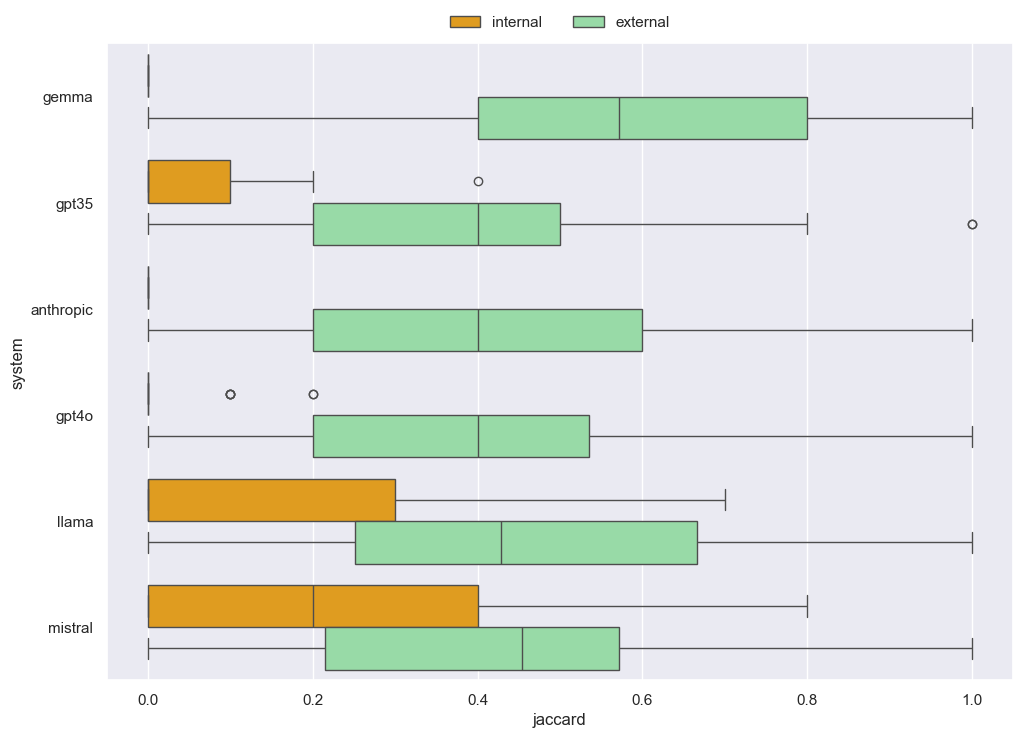

In [27]:
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid", palette="pastel",rc={'figure.figsize':(11.7,8.27)})
jaccard = pd.DataFrame({"system": all_sys+all_sys2, "jaccard": all_taus+all_taus2, "test": ['internal']*len(all_sys)+['external']*len(all_sys2)})
ax = sns.boxplot(data=jaccard, x="jaccard", y="system", hue="test", palette=["orange", "g"])
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
g = sns.violinplot(data=jaccard, x="Jaccard similarity", y="system", inner="point")


In [13]:
from collections import Counter
from scipy.stats import chi2_contingency
import itertools
all_towns = []
flatened_sys = []
sys_name = ['chatgot', 'gemini']
for name, sys in zip(sys_name, [all_q_gpt, all_q_gemma]):
    flattened = [val for sublist in sys for val in sublist]
    flatened_sys.append(flattened)
    all_towns.extend(flattened)
all_towns = set(all_towns)

alpha = 0.05
for (sys1, sys2) in itertools.combinations(flatened_sys, 2):
    hist1 = Counter(sys1)
    hist2 = Counter(sys2)
    # generate vectors
    h1, h2 = [], []
    for town in all_towns:
        print(town)
        h1.append(hist1[town])
        h2.append(hist2[town])
    print(h1)
    print(h2)
    stat, p, dof, expected = chi2_contingency([h1, h2])
    # interpret p-value

    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

Montclair
Clifton
New Brunswick
Asbury Park
Princeton
Hoboken
Jersey City
Somerville
Morristwon
[4, 1, 0, 4, 1, 3, 3, 0, 4]
[4, 0, 4, 1, 0, 4, 4, 3, 0]
p value is 0.057500071951292704
Independent (H0 holds true)
